In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [69]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNING= False

In [71]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

In [3]:
from keras.datasets import mnist

The mnist dataset consists of 70000 images of handwritten digits.

Defining our deep learning neural network using Keras packages. We import the Sequential, Dense, Dropout and Activation packages for defining the network architecture. We use load_model package for saving and retrieving our model. We also use np_utils for a few utilities that we need in our project. These imports are done with the following program statements

In [6]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation
from keras.utils import to_categorical

In [7]:
model=Sequential()

In [8]:
model.add(Dense(512, input_shape=(784,)))

In [9]:
model.add(Activation('relu'))
model.add(Dropout(0.2))

Hidden Layer

In [11]:
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

Output Layer

In [13]:
model.add(Dense(10))

In [14]:
model.add(Activation('softmax'))

In [15]:
print('Network Architecture Defined')

Network Architecture Defined


In [16]:
#Compiling the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [17]:
#Loading Data
(X_train, Y_train), (X_test, Y_test)=mnist.load_data()

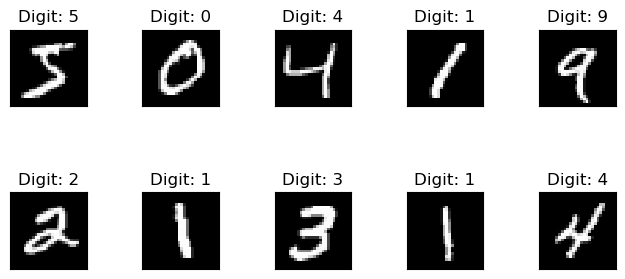

In [18]:
#Printing first 10 images

for i in range(10):
    plt.subplot(3,5,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(Y_train[i]))
    plt.xticks([])
    plt.yticks([])

In [19]:
#Reshaping input vector
X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000, 784)

In [20]:
#Normalizing data
X_train= X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Text(0.5, 1.0, 'Digit: 5')

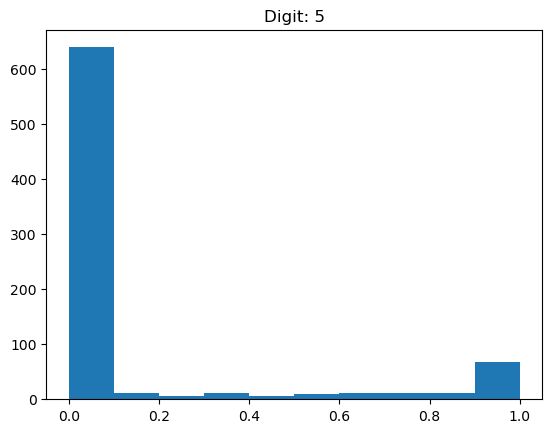

In [21]:
plt.hist(X_train[0])
plt.title("Digit: {}".format(Y_train[0]))

In [22]:
#number of unique values and the number of occurrences of each digit
print(np.unique(Y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


In [23]:
n_classes=10
Y_train=to_categorical(Y_train, n_classes)

In [24]:
for i in range(5):
    print(Y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [25]:
Y_test=to_categorical(Y_test, n_classes)

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history=model.fit(X_train,Y_train,batch_size=128, epochs=20, verbose=2, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 - 9s - 19ms/step - accuracy: 0.9263 - loss: 0.2466 - val_accuracy: 0.9689 - val_loss: 0.0995
Epoch 2/20
469/469 - 7s - 14ms/step - accuracy: 0.9694 - loss: 0.0995 - val_accuracy: 0.9730 - val_loss: 0.0883
Epoch 3/20
469/469 - 7s - 15ms/step - accuracy: 0.9776 - loss: 0.0715 - val_accuracy: 0.9761 - val_loss: 0.0771
Epoch 4/20
469/469 - 6s - 13ms/step - accuracy: 0.9822 - loss: 0.0549 - val_accuracy: 0.9750 - val_loss: 0.0809
Epoch 5/20
469/469 - 7s - 14ms/step - accuracy: 0.9847 - loss: 0.0470 - val_accuracy: 0.9809 - val_loss: 0.0632
Epoch 6/20
469/469 - 6s - 14ms/step - accuracy: 0.9868 - loss: 0.0400 - val_accuracy: 0.9797 - val_loss: 0.0766
Epoch 7/20
469/469 - 6s - 14ms/step - accuracy: 0.9896 - loss: 0.0323 - val_accuracy: 0.9776 - val_loss: 0.0820
Epoch 8/20
469/469 - 7s - 15ms/step - accuracy: 0.9900 - loss: 0.0293 - val_accuracy: 0.9808 - val_loss: 0.0731
Epoch 9/20
469/469 - 6s - 13ms/step - accuracy: 0.9900 - loss: 0.0301 - val_accuracy: 0.9834 - val_loss:

In [28]:
loss_and_metrics=model.evaluate(X_test, Y_test, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.9818 - loss: 0.0850


In [29]:
print("Test Loss: ", loss_and_metrics[0])
print("Test Accuracy: ", loss_and_metrics[1])

Test Loss:  0.08499234914779663
Test Accuracy:  0.9818000197410583


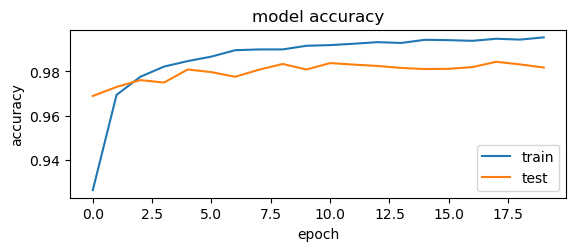

In [30]:
#Plotting accuracy metrics
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

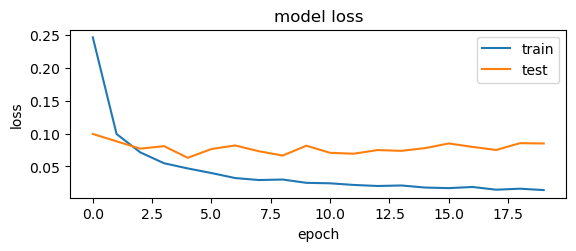

In [31]:
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [32]:
predictions=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step   


In [33]:
correct_predictions=np.nonzero(predictions==Y_test)[0]
incorrect_predictions=np.nonzero(predictions!=Y_test)[0]

In [34]:
print(len(correct_predictions)," Classified correctly")
print(len(incorrect_predictions)," Classified incorrectly")

6437  Classified correctly
93563  Classified incorrectly


In [75]:
#Saving Model
directory = "./models/"
name = 'handwrittendigitrecognition.h5'
path = os.path.join(directory, name)
model.save(path)
print('Saved trained model at %s ' % path)

Saved trained model at ./models/handwrittendigitrecognition.h5 


In [77]:
model = load_model ('./models/handwrittendigitrecognition.h5')